In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)
data.shape

(1464, 12)

In [22]:
#Cleans columns 'price','number_beds' and 'number_baths' 
#and converts them to numeric values
#Not needed in the new version of the scraper

#data['price']=data['price'].str.replace('[£, pcmw]','')
#data['number_beds']=data['number_beds'].str.replace('[beds ]','')
#data['number_baths']=data['number_baths'].str.replace('[ baths]','')

#data['price']=pd.to_numeric(data['price'])
#data['number_beds']=pd.to_numeric(data['number_beds'])
#data['number_baths']=pd.to_numeric(data['number_baths'])

In [30]:
#Converting string data to datetime.date


data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from']=data['available_from'].dt.date
data['incorporation_date']=pd.to_datetime(data['incorporation_date'],errors='coerce')
data['incorporation_date']=data['incorporation_date'].dt.date



(43,)

In [4]:
#Brief analysis about number of letting agents 
#and number of properties available to rent

number_of_agents=data['letting_agent_name'].value_counts().count()
number_of_properties=data['letting_agent_name'].value_counts().sum()
print('Number of agents: {}'.format(number_of_agents))
print('Number of properties: {}'.format(number_of_properties))

Number of agents: 113
Number of properties: 1461


In [5]:
#Market share in % for the 10 biggest agencies

market_share=data['letting_agent_name'].value_counts().head(10)/data['letting_agent_name'].value_counts().sum()
market_share=market_share.rename('Market share by agency. First 10 agencies')
market_share

OpenRent                                     0.15
Homelike Internet GmbH                       0.14
DJ Alexander Lettings Ltd                    0.06
Braemore Sales and Lettings                  0.06
Staykeepers                                  0.04
Southside Property Management                0.04
Murray & Currie Property                     0.04
Grant Property                               0.03
Northwood Residential Lettings (Edinburgh)   0.02
Houst Lets                                   0.02
Name: Market share by agency. First 10 agencies, dtype: float64

In [6]:
#Splitting images urls. This need more processing
data['images']=data['images'].str.split(',')
data['images']

property_index
0       [https://lid.zoocdn.com/u/480/360/99950c25e3c4...
1       [https://lid.zoocdn.com/u/480/360/1d28b2da09fc...
2       [https://lid.zoocdn.com/u/480/360/26f006625854...
3       [https://lid.zoocdn.com/u/480/360/1c19f78fbd8d...
4       [https://lid.zoocdn.com/u/480/360/2488fe80b4e0...
                              ...                        
1459    [https://lid.zoocdn.com/u/480/360/9a7879e7d2a9...
1460    [https://lid.zoocdn.com/u/480/360/1274a7484968...
1461    [https://lid.zoocdn.com/u/480/360/f0037d04454d...
1462    [https://lid.zoocdn.com/u/480/360/edd3445ed653...
1463    [https://lid.zoocdn.com/u/480/360/df3f0d1a87ed...
Name: images, Length: 1464, dtype: object

In [7]:
# Data available about coordinates
#(data[['latitude','longitude']].dropna().shape)[0]/(data[['latitude','longitude']].shape)[0]

# Only 25% of the properties have coordinates. Another API that produces better results
# must be evaluated

<AxesSubplot:ylabel='Frequency'>

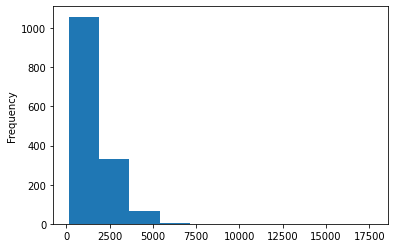

In [8]:
#First histogram of rent prices

data['price'].plot(kind='hist')

#Most of the properties have rents below 2500pcm

Text(0.5, 1.0, 'Distribution of rent (properties below 2500 pcm) [pcm]')

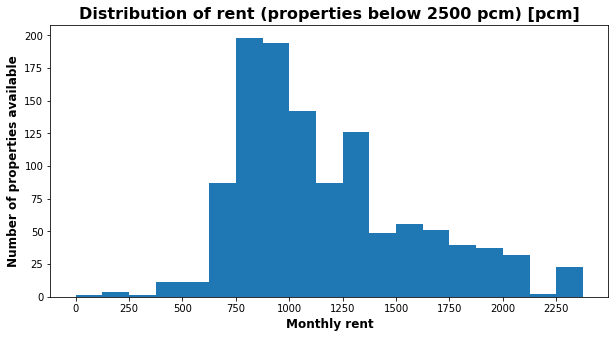

In [9]:
#Histogram with rents below 2500pcm

fig,ax=plt.subplots(figsize=(10,5))

data_less_2500=data[data['price']<=2500]

ax.hist(data_less_2500['price'],bins=np.arange(0,2500,125))
ax.set_xticks(np.arange(0,2500,250))
ax.set_xlabel('Monthly rent',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Distribution of rent (properties below 2500 pcm) [pcm]',
fontsize=16,fontweight='heavy')

#There is a huge offer for properties from above 750pcm

In [10]:
data.dtypes

address                object
available_from         object
description            object
features               object
images                 object
incorporation_date     object
letting_agent_name     object
number_of_baths       float64
number_of_beds        float64
price                 float64
property_url           object
title                  object
dtype: object

UndefinedVariableError: name 'waiting_period_days' is not defined

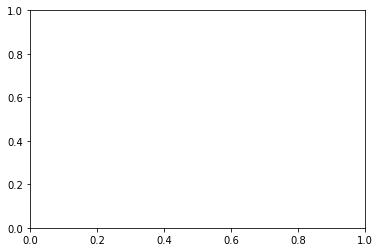

In [11]:
fig,ax=plt.subplots()

#data['waiting_period_days']=data['available_from'] FIX THIS SO DIFFERENCE CAN BE CALCULLATED
waiting_period_days_after_3_days=data.query('waiting_period_days<100 & waiting_period_days>3')['waiting_period_days']

ax.hist(waiting_period_days_after_3_days.values,bins=np.arange(0,100,10))
ax.set_xticks(np.arange(0,100,10))
ax.set_xlabel('Waiting period (days)',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Waiting time distribution [days]',fontsize=16,fontweight='heavy')


In [ ]:
datetime.datetime.now().date()

datetime.date(2022, 2, 19)

In [ ]:
#Let's do the same analysis segmenting by different types of properties and prices

In [ ]:
#Splitting the properties in four different segments accoirding to their price

data_500_1000=data.query('price>500 & price<=1000')
data_1000_1500=data.query('price>1000 & price<=1500')
data_1500_2000=data.query('price>1500 & price<=2000')
data_2000_3000=data.query('price>2000 & price<=3000')

Text(0.5, 0, 'Monthly rent [pcm]')

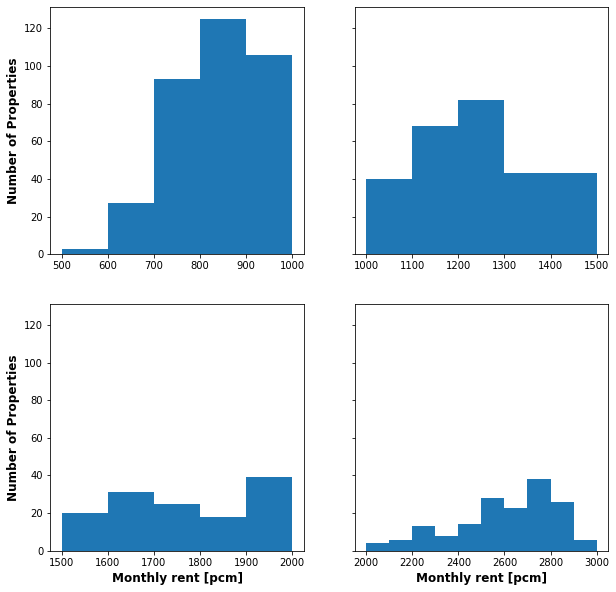

In [ ]:
#Bar plots of price distribution segmented by prices

fig,ax=plt.subplots(2,2,figsize=(10,10),sharey=True)
ax[0,0].hist(data_500_1000['price'],bins=np.arange(500,1100,100))
ax[0,1].hist(data_1000_1500['price'],bins=np.arange(1000,1600,100))
ax[1,0].hist(data_1500_2000['price'],bins=np.arange(1500,2100,100))
ax[1,1].hist(data_2000_3000['price'],bins=np.arange(2000,3100,100))

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Monthly rent [pcm]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Monthly rent [pcm]',fontsize=12,fontweight='heavy')

# This seems just a confirmation of what the first price distribution showed.
# For the segment between 500 and 1000 pcm there is an increase of properties available with the price.
# For the rest of the segments the number of properties available is more less stable, 
# diminishing slowly as the price increases

KeyError: 'waiting_period_days'

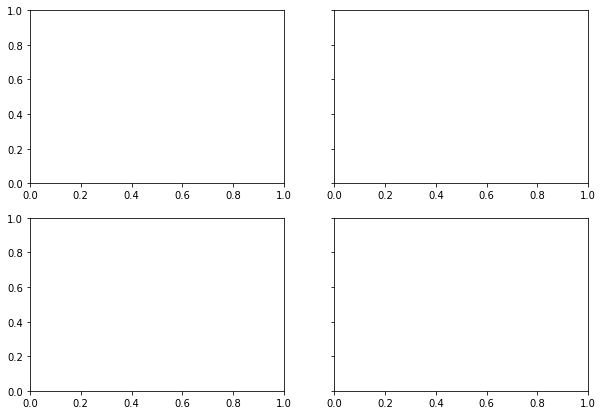

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,7),sharey=True)
ax[0,0].hist(data_500_1000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[0,1].hist(data_1000_1500.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,0].hist(data_1500_2000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,1].hist(data_2000_3000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')

ax[0,0].set_xlabel('Availability (500-1000pcm) [days]',fontsize=12,fontweight='heavy')
ax[0,1].set_xlabel('Availability (1000-1500pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Availability (1500-2000pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Availability (2000-3000pcm) [days]',fontsize=12,fontweight='heavy')

#Seems that in most cases the properties are available to be taken in the first 30 days,
#except for the properties above 2000pcm. The waiting time is under 20 days for most of them

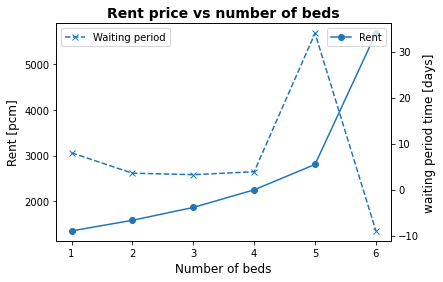

In [ ]:
data_by_beds=data.groupby('number_of_beds')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})

fig,ax=plt.subplots()
ax.plot(data_by_beds.index,data_by_beds['price']['mean'],linestyle='-',marker='o',label='Rent')
ax.set_xlabel('Number of beds',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of beds',fontsize=14,fontweight='heavy')
ax.legend(loc=1)
ax2=ax.twinx()
ax2.plot(data_by_beds.index,data_by_beds['waiting_period_days']['mean'],linestyle='--',marker='x',label='Waiting period')
ax2.set_ylabel('waiting period time [days]',fontsize=12)
ax2.legend(loc=0)

In [ ]:
data_by_beds

price          waiting_period_days
               count     mean                mean
number_of_beds                                   
1.00             398 1,354.19                7.98
2.00             400 1,586.15                3.56
3.00             148 1,866.49                3.23
4.00              49 2,251.43                3.88
5.00               8 2,805.62               34.00
6.00               6 5,669.17               -9.00

Text(0.5, 1.0, 'Rent price vs number of baths')

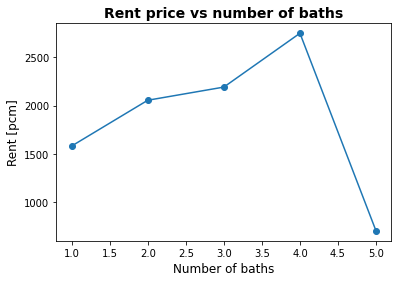

In [ ]:
data_by_baths=data.groupby('number_of_baths')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})
fig,ax=plt.subplots()
ax.plot(data_by_baths.index,data_by_baths['price']['mean'],linestyle='-',marker='o')
ax.set_xlabel('Number of baths',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of baths',fontsize=14,fontweight='heavy')

Text(0.5, 0, 'Date')

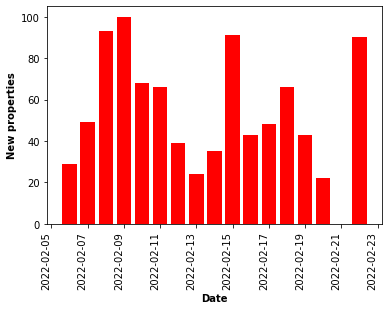

In [21]:
#day_names=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#day_index=[day_names[x.weekday()] for x in data.groupby('incorporation_date').count()['price'].index.to_list()]
plt.bar(data.groupby('incorporation_date').count()['price'][1:].index,data.groupby('incorporation_date').count()['price'][1:],linestyle='--',
color='r',linewidth=5)
plt.xticks(rotation=90,ha='right')
plt.ylabel('New properties',fontweight='heavy')
plt.xlabel('Date',fontweight='heavy')
